Q7. Build a Decision Tree (sklearn)

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train trees with different max_depth
depths = [1, 2, 3]
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Training accuracy
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)

    # Test accuracy
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Max Depth {depth}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")

Max Depth 1: Train Accuracy = 0.6476, Test Accuracy = 0.7111
Max Depth 2: Train Accuracy = 0.9429, Test Accuracy = 0.9778
Max Depth 3: Train Accuracy = 0.9524, Test Accuracy = 1.0000


Q8. kNN Classification (sklearn)

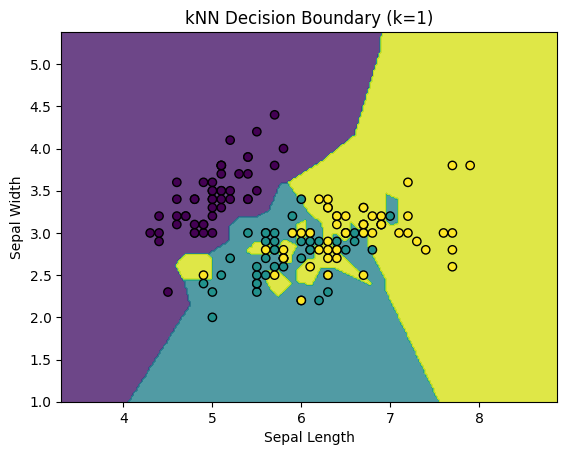

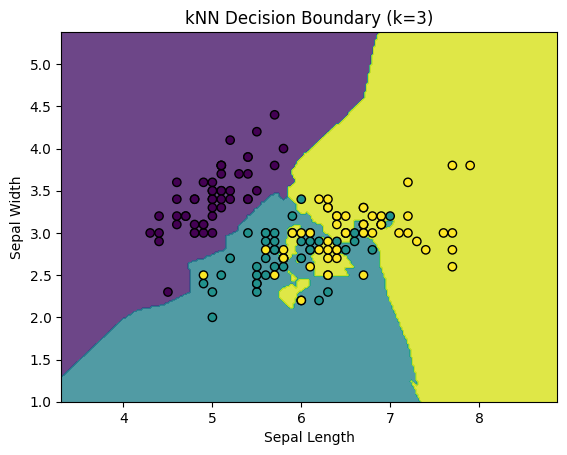

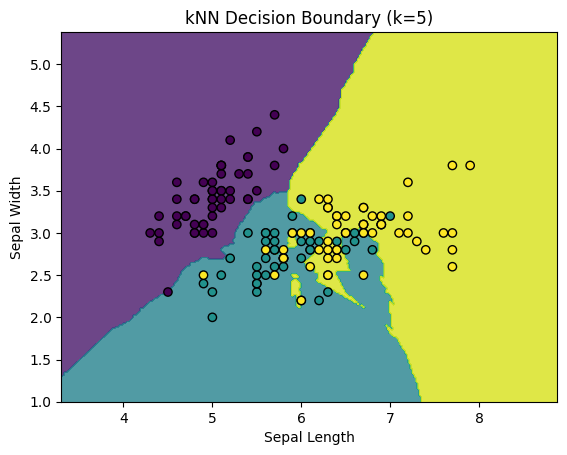

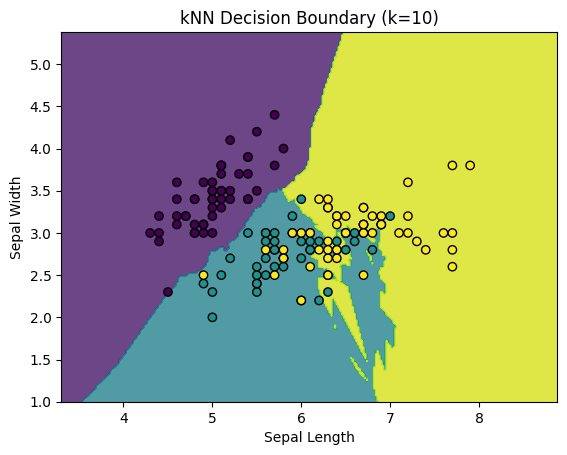

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load data (only sepal length and width)
iris = load_iris()
X = iris.data[:, :2]  # Select only first two columns (Sepal length, sepal width)
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title):
    h = 0.02  # Mesh step size

    # Created fine grid covering the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Make predictions for every point in the grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # Predict and reshape
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

# Train and plot for each k
ks = [1, 3, 5, 10]
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_decision_boundaries(X, y, knn, f"kNN Decision Boundary (k={k})")

Q9. Performance Evaluation Programming

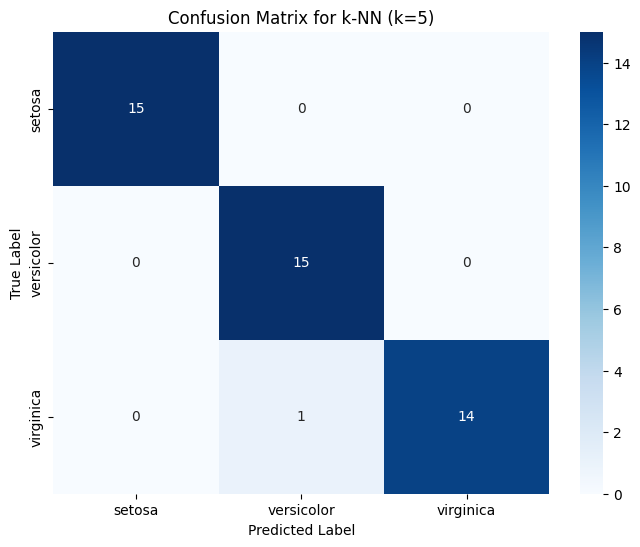


Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Class 0 AUC = 1.0000
Class 1 AUC = 0.9956
Class 2 AUC = 0.9956


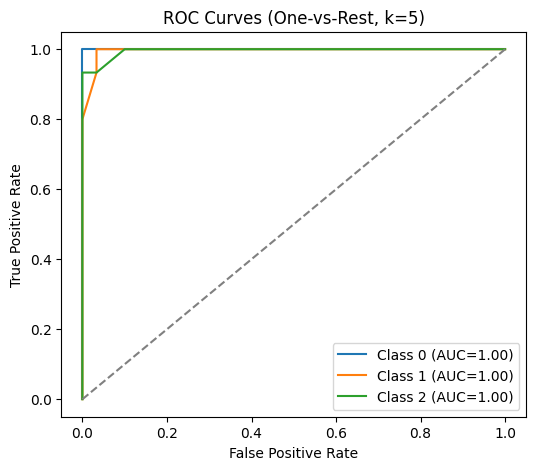

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train kNN with k=5
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap for better interpretation
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for k-NN (k=5)')
plt.show()

# Classification report
print("\nClassification report:\n", metrics.classification_report(
    y_test, y_pred, target_names=iris.target_names
))

# ROC and AUC (one-vs-rest)
y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_score = clf.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(f"Class {i} AUC = {roc_auc[i]:.4f}")

# Plot ROC curves
plt.figure(figsize=(6,5))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC={roc_auc[i]:.2f})")
plt.plot([0,1],[0,1],'--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (One-vs-Rest, k=5)")
plt.legend(loc="lower right")
plt.show()
